<center><font size="8">Credit Card Fraud Detection</font></center>

**CF969-7-SP: Assignment: Part II: Software for financial industry (worth 34%)**          Registration: 2101142

***Project files details and description***

*Files sizes are larger, maximum limit of file upload on faser is 50MB. Please download the file from below URLs which are accessible publicly*

**<center>Files directory to download from: Google drive</center>**

https://drive.google.com/drive/folders/1hyt-VXeMy9qlCMtRaCZyh5qpK_Df3aY6?usp=sharing          # All files are in this drive    

https://drive.google.com/file/d/1Xdv1seoMXKjvmHJ0jWROFt0fL-HBXfJz/view?usp=sharing    #fraudtrain.csv

https://drive.google.com/file/d/1VZurgWJ9dbcz2hcX7NyMVEBXjl1U5G22/view?usp=sharing     #fraudtest.csv

https://drive.google.com/file/d/184uFgmO5G7ogEEJMfe5plLt9onc2V8dF/view?usp=sharing     #creditcard.csv

**Description of the Project -- Fraud Detection** : In this project I have done analysis of two datasets on fraud detection. Both datasets have been taken from Kaggle.com. The first dataset context is for companies to detect fraudulent transactions so that to avoid losing customer bank and to avoid transactions for customers which they never did. The dataset is on kaggle which captures data of Sept 2013 transactions made through credit cards of European Cardholders. Dataset have total 284,807 transactions out of which 492 are fraudulent transactions. The dataset is highly imbalanced, where fradulent cases are just 0.172% of total transactions. 

  References: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud  https://www.kaggle.com/  https://www.kaggle.com/code/anuragsinghtomar/capstone-credit-card-fraud-detection/data

# Fraud Detection: Wrangling & EDA Dataset 1

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
credit_card_df = pd.read_csv('creditcard.csv')

In [3]:
#read the data
data = pd.read_csv("creditcard.csv")
creditcard_df = data.copy()

In [4]:
#Reading head and tail data from dataset
head = creditcard_df.head()
tail = creditcard_df.tail()
head.append(tail)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


**Data Exploration and Visualization**

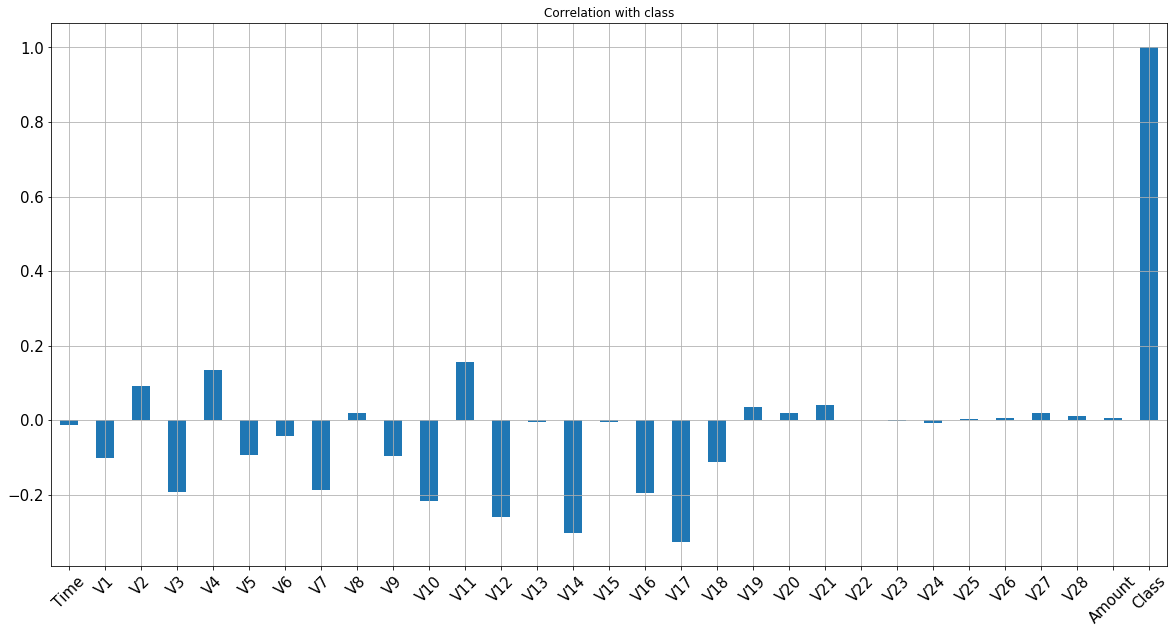

In [5]:
# Correlation plot -- as can be seen, no features are highly correlated to class feature

creditcard_df.corrwith(creditcard_df.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

In [6]:
#Descriptive statistics
print(round(creditcard_df.describe().transpose(), 2))
#The average transaction amount being substantially higher than the median suggests that there is a 
#relatively small number of very large transactions that drive the mean upward.

           count      mean       std     min       25%       50%        75%  \
Time    284807.0  94813.86  47488.15    0.00  54201.50  84692.00  139320.50   
V1      284807.0      0.00      1.96  -56.41     -0.92      0.02       1.32   
V2      284807.0      0.00      1.65  -72.72     -0.60      0.07       0.80   
V3      284807.0     -0.00      1.52  -48.33     -0.89      0.18       1.03   
V4      284807.0      0.00      1.42   -5.68     -0.85     -0.02       0.74   
V5      284807.0     -0.00      1.38 -113.74     -0.69     -0.05       0.61   
V6      284807.0      0.00      1.33  -26.16     -0.77     -0.27       0.40   
V7      284807.0     -0.00      1.24  -43.56     -0.55      0.04       0.57   
V8      284807.0     -0.00      1.19  -73.22     -0.21      0.02       0.33   
V9      284807.0     -0.00      1.10  -13.43     -0.64     -0.05       0.60   
V10     284807.0      0.00      1.09  -24.59     -0.54     -0.09       0.45   
V11     284807.0      0.00      1.02   -4.80     -0.

In [8]:
# check for relative proportion -- details of the legitimate & fraudulent transactions

print("Legit transactions: " + str(len(creditcard_df[creditcard_df['Class'] == 0])))
print("Fraudulent transactions: " + str(len(creditcard_df[creditcard_df['Class'] == 1])))

overall_transactions = creditcard_df.shape[0]
total_fraud_cases_ratio = str(len(creditcard_df[creditcard_df['Class'] == 1])/overall_transactions )
print("Ratio of Fraudulent transaction: " + total_fraud_cases_ratio )

Legit transactions: 284315
Fraudulent transactions: 492
Ratio of Fraudulent transaction: 0.001727485630620034


**Class Imbalance** : The below charts are showing class imbalance problem which is resolved later. Class imbalance problem refers to the sample which is biased and contains more data points related to one set. For example, in the below chart in the dataset, legitimate transactions are more than fradulent, so it will make it difficult for ML to train properly. 

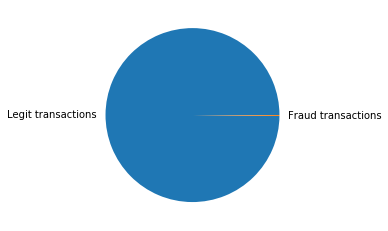

In [9]:
# visualizing fraud transactions
classified_df = creditcard_df

classified_df[' '] = np.where(creditcard_df['Class'] == 0 , 'Legit transactions',  'Fraud transactions')

# plot a pie chart
classified_df[' '].value_counts().plot(kind="pie")

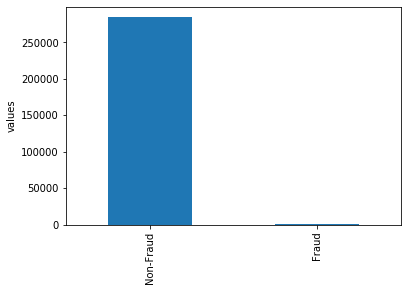

In [11]:
Labels = ['Non-Fraud', 'Fraud']

classified_df[' '].value_counts().plot(kind='bar')
plt.ylabel('values')
plt.xticks(range(2), Labels)
plt.show()

It can be seen from the pie chart that the data is imbalanced, as fraudulent cases are just 0.017%
of the total cases

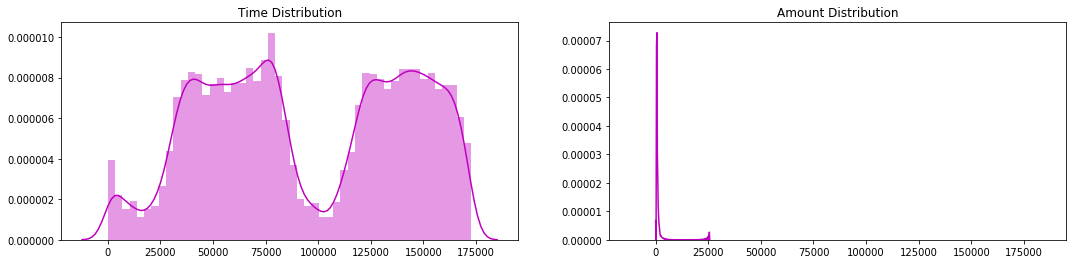

In [12]:
# plot the named features 
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

amount = creditcard_df['Amount'].values # values
time = creditcard_df['Time'].values # values

sns.distplot(time, hist=True, color="m", kde_kws={"shade": False}, ax=axes[0]).set_title('Time Distribution')
sns.distplot(amount, hist=False, color="m", kde_kws={"shade": False}, ax=axes[1]).set_title('Amount Distribution')

plt.show()

**possible difference(s) between valid and fraud transactions**

In [13]:
print('Average Amount in a genuine transactions:    ' + str(round(creditcard_df[creditcard_df['Class'] == 0]['Amount'].mean(),2)))
print('Average Amount in a fraudulent transactions: ' + str(round(creditcard_df[creditcard_df["Class"] == 1]["Amount"].mean(),2)))

Average Amount in a genuine transactions:    88.29
Average Amount in a fraudulent transactions: 122.21


**It is clear that fraudulent transactions average amount is more than genuine transactions amount, this way we can find out the transactions made are fraud**

In [15]:
print("Summary of Amount feature" + "\n")  # mean is greater than median, as discussed above some small transaction of high frequency are occurred
print(round(creditcard_df["Amount"].describe(),3))

Summary of Amount feature

count    284807.000
mean         88.350
std         250.120
min           0.000
25%           5.600
50%          22.000
75%          77.165
max       25691.160
Name: Amount, dtype: float64


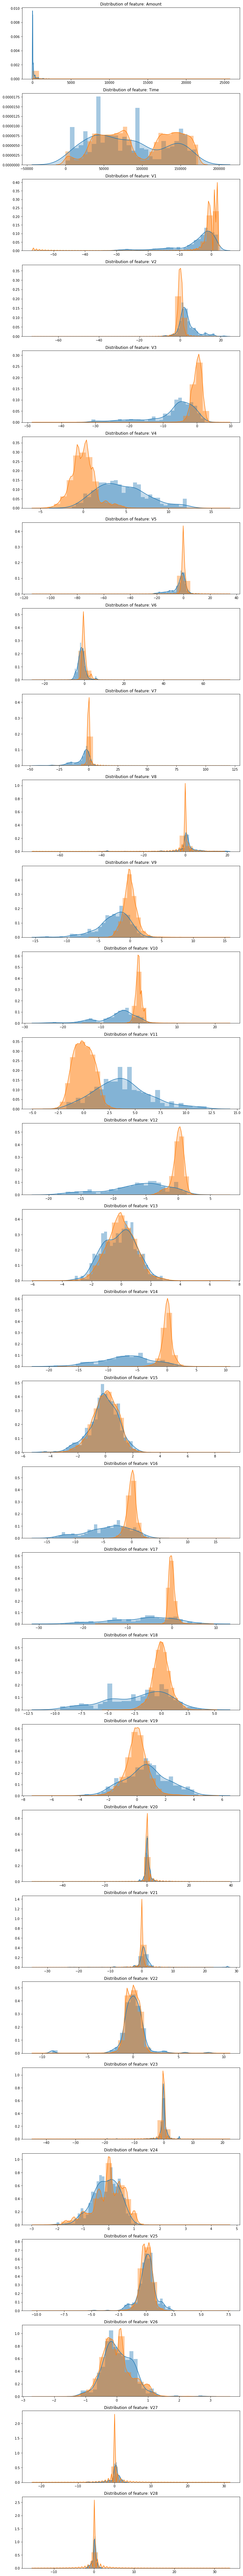

In [17]:
#distribution of different features, Amount, Time, v1, v2..
plot_df = creditcard_df.copy()

amount = plot_df['Amount']
plot_df.drop(labels=['Amount'], axis=1, inplace = True)
plot_df.insert(0, 'Amount', amount)

# Plot the distributions of the features
plot_df_columns = plot_df.iloc[:,0:30].columns
plt.figure(figsize=(12,29*5))
grids = gridspec.GridSpec(30, 1)

for grid, idx in enumerate(plot_df[plot_df_columns]):
 ax = plt.subplot(grids[grid])
 sns.distplot(plot_df[idx][plot_df.Class == 1], hist=True, kde_kws={"shade": True}, bins=30)
 sns.distplot(plot_df[idx][plot_df.Class == 0], hist=True, kde_kws={"shade": True}, bins=30)
 ax.set_xlabel("")
 ax.set_title("Distribution of feature: "  + str(idx))
plt.show()

# Valid/genuine transactions: Orange 
# Fraudulent transactions: blue

***Data preparation***

In [18]:
# check for missing values

print("Missing values: " + str(creditcard_df.shape[0] - creditcard_df.isnull().shape[0]))
print("Non missing values: " + str(creditcard_df.isnull().shape[0]))

#There is no missing data/column values

Missing values: 0
Non missing values: 284807


**Feature Scaling** : Standardization is done to normalize the values for computational purposes

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
creditcard_df['Standardized_Amount'] = scaler.fit_transform(creditcard_df['Amount'].values.reshape(-1,1))
creditcard_df['Standardized_Time'] = scaler.fit_transform(creditcard_df['Time'].values.reshape(-1,1))
creditcard_df.drop(['Amount', 'Time'], inplace = True, axis=1)
creditcard_df.head().append(creditcard_df.tail())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,,Standardized_Amount,Standardized_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,Legit transactions,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,Legit transactions,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,Legit transactions,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,Legit transactions,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,Legit transactions,-0.073403,-1.996541
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,Legit transactions,-0.350151,1.641931
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,Legit transactions,-0.254117,1.641952
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,Legit transactions,-0.081839,1.641974
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,Legit transactions,-0.313249,1.641974
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0,Legit transactions,0.514355,1.642058


In [25]:
creditcard_df.dtypes

V1                     float64
V2                     float64
V3                     float64
V4                     float64
V5                     float64
V6                     float64
V7                     float64
V8                     float64
V9                     float64
V10                    float64
V11                    float64
V12                    float64
V13                    float64
V14                    float64
V15                    float64
V16                    float64
V17                    float64
V18                    float64
V19                    float64
V20                    float64
V21                    float64
V22                    float64
V23                    float64
V24                    float64
V25                    float64
V26                    float64
V27                    float64
V28                    float64
Class                    int64
Standardized_Amount    float64
Standardized_Time      float64
dtype: object

In [24]:
creditcard_df.drop(labels=[' '], axis=1, inplace = True)

In [26]:
#RobustScaler is robust to outliers, this sclaer removed the median and scales the features according to the quantile range
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(plot_df[["Time", "Amount"]])
plot_df[["Time", "Amount"]] = scaler.transform(plot_df[["Time", "Amount"]])

plot_df.head().append(plot_df.tail())

,Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,Legit transactions
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,Legit transactions
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,Legit transactions
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,Legit transactions
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,Legit transactions
284802,-0.296653,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,Legit transactions
284803,0.038986,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,Legit transactions
284804,0.641096,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,Legit transactions
284805,-0.167680,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,Legit transactions
284806,2.724796,1.035022,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0,Legit transactions


In [73]:
creditcard_df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Standardized_Amount,Standardized_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583


In [74]:
# Separate response and features  -- Undersampling before cross validation will lead to overfiting

X = creditcard_df.drop("Class", axis=1)   #Feature Matrix
y = creditcard_df["Class"]          #Target Variable

# Use SKLEARN for the split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [76]:
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 227845
Length of X_test is: 56962
Length of y_train is: 227845
Length of y_test is: 56962


**<center>Machine learning Algorithms</center>**

**Logistic Regression -- class imbalance issue exists here which will be addressed later:**

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [78]:
model_logistic_regressor = LogisticRegression()
model_logistic_regressor.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [79]:
predict_logit_regressor = model_logistic_regressor.predict(X_test)

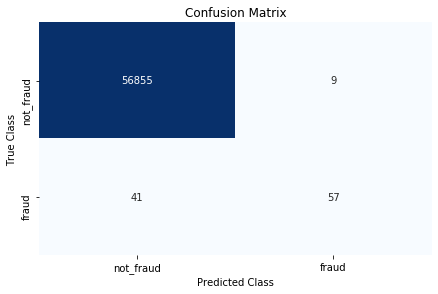

In [80]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, predict_logit_regressor)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

*In the above case accuracy is high due to class imbalance, fraud cases are negligible so accuracy will be high, this situation can be resolved by applying sampling or in other way, we will look at other metrics to identify the correct cases, details below:*

*Evaluation
For a financial institution dealing with identifying fraud, Sensitivity and F1 - Score might be more important metrics.
F1- Score reprsents a more balanced result as it is the harmonic mean between Precision and Recall.
Sensitivity is more important in the sense that we are more interested in identifying fraud than than identifying legitimate customers. ( Assumption )*

**f1 Score | Sensitivity/Recall metrics**

In [81]:
from sklearn.metrics import f1_score, recall_score

f1_score = round(f1_score(y_test, predict_logit_regressor), 2)
recall_score = round(recall_score(y_test, predict_logit_regressor), 2)

print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model 1 : 0.58
F1 Score for Logistic Regression Model 1 : 0.7


A perfect classifier has precision and recall both equal to 1, above case Recall is 0.58 which is very low. This is because of class imbalance issue.

.

**Random Forest & Decision Tree Classifiers -- class imbalance issue exists here which will be addressed later:**

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

In [83]:
decision_tree.fit(X_train, y_train)
predictions_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, y_test) * 100

random_forest.fit(X_train, y_train)
predictions_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, y_test) * 100

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.95962220427653
Decision Tree Score:  99.91222218320986


*Accuracy of both models are very high, this is the same reason and because of class imbalance, in which class distribution is highly imbalanced. In our case fraud cases are very small while legitimate cases are more than 99%. So here we will rely on Recall, Precision and other metrics.*

In [84]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

def cust_metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [85]:
from termcolor import colored as cl # text customization
import itertools # advanced tools

In [86]:
# defining the plot function  -- confusion matrix

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Actual/True label')
    plt.xlabel('Predicted label')

**Confusion Matrix - Decision Tree**

Confusion Matrix - Decision Tree
[[56833    31]
 [   19    79]]


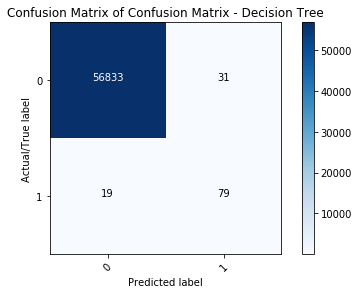

In [88]:
confusion_matrix_dt = confusion_matrix(y_test, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree")

In [89]:
from sklearn import metrics

Evaluation of Decision Tree Model

Accuracy: 0.99912
Precision: 0.71818
Recall: 0.80612
F1-score: 0.75962
AUC:
 0.9027886442984623


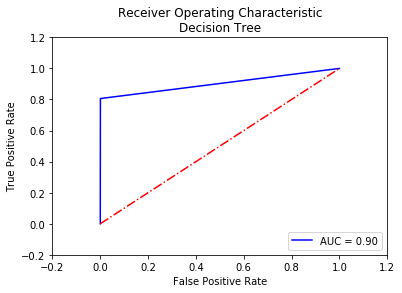

In [90]:
print("Evaluation of Decision Tree Model")
print()

y_dt_prob = decision_tree.predict_proba(X_test)[:,1]
cust_metrics(y_test, predictions_dt.round())

print("AUC:\n",metrics.roc_auc_score(y_test,y_dt_prob))
auc=metrics.roc_auc_score(y_test,y_dt_prob)

#plotting the ROC curve
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_dt_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nDecision Tree')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

*Accuracy, Recall, Precision metrics are given above, Recall and Precision are very low, which are very sensitive as we will try to minimize fraud cases as much as possible. This will be improved further by applying sampling to datasets.*

.

**Confusion Matrix - Random Forest**

Confusion Matrix - Random Forest
[[56862     2]
 [   21    77]]


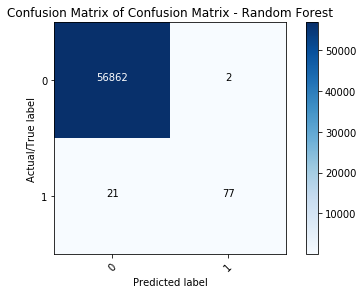

In [91]:
confusion_matrix_rf = confusion_matrix(y_test, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

In [92]:
print("Evaluation of Random Forest Model")
print()
cust_metrics(y_test, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99960
Precision: 0.97468
Recall: 0.78571
F1-score: 0.87006


*Accuracy, Recall, Precision metrics are given above, Recall and Precision are very low, which are very sensitive as we will try to minimize fraud cases as much as possible. This will be improved further by applying sampling to datasets.*


**<center>Working on the Class-Imbalance issue -- fixing it through SMOTE</center>**

**We will perform Over-sampling class that uses SMOTE.**

The above models predicting all the transactions valid has **accuracy: 99.95%** and the fraud cases are very few around 0.17%.
 Hence we cannot rely on accuracy metric here because the dataset is imbalanced.
 We will explore more metrics to get better insights such as Recall, precision, and f1 score

 **Recall = True Positive / True Positive + False Negative**
 There are chances in the model that it predicts fraudulent cases as legal transactions and   therefore we can get bad model with poor accuracy, Recall prevents this behaviour.

 **Precision = True Positive / True Positive + False Positive**
 Sometimes our model take legit transactions as fraudulent, precision makes sure it spot those cases

 **F1 score = harmonic mean of the recall and precision** thus gives best average value between  precision and recall
 
 In this case study Recall is more important than Precision because identifying fraudulent transaction as genuine can cost us too much, while precision predicts good transaction as bad is a
 after all recoverable.  

In [93]:
from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, y)    #sm=SMOTE(random_state=2)

print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)
#value_counts = Counter(Y_resampled)
#print(value_counts)
(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (568630, 30)
Resampled shape of Y:  (568630,)


In [94]:
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)
predictions_resampled_rf = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100
random_forest_score_resampled

99.99120693596892

Confusion Matrix - Random Forest
[[85134    15]
 [    0 85440]]


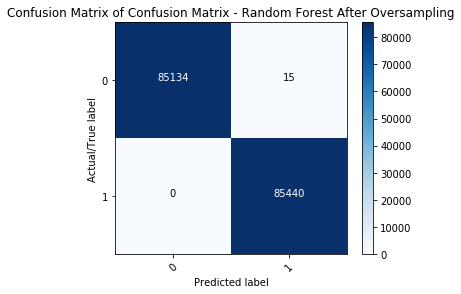

In [95]:
cm_resampled = confusion_matrix(test_Y, predictions_resampled_rf.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)
plot_confusion_matrix(cm_resampled, classes=[0, 1], title= "Confusion Matrix - Random Forest After Oversampling")

In [96]:
print("Evaluation of Random Forest Model")
print()
cust_metrics(test_Y, predictions_resampled_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99991
Precision: 0.99982
Recall: 1.00000
F1-score: 0.99991


**As can be seen from the above metrics, it is clear that Precision, Recall and Accuracy everything is almost 100% because there is no more class imbalance issue, due to applying oversampling technique SMOTE**

.

**Features importance**

In [97]:
predictors = [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount', 'Time']

In [98]:
rf_resampled.feature_importances_

array([0.01363081, 0.0169478 , 0.04975091, 0.12370672, 0.00883189,
       0.00662293, 0.03438207, 0.01446071, 0.01683631, 0.10477594,
       0.089353  , 0.09516603, 0.00849633, 0.18879719, 0.0072011 ,
       0.0462964 , 0.07303337, 0.01350691, 0.01134288, 0.00749996,
       0.01108072, 0.00442401, 0.00661936, 0.00451329, 0.00538812,
       0.00751742, 0.00525086, 0.00777877, 0.00973202, 0.00705616])

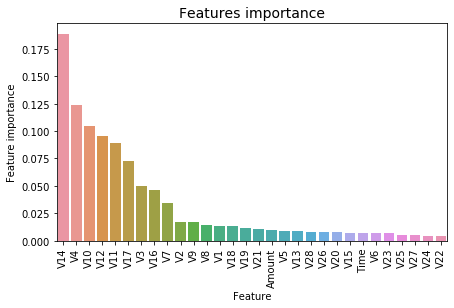

In [99]:

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': rf_resampled.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

*The most important features are V14, V12, V4, V10, V11, V17, v3.*

AUC:
 0.9999927596488385


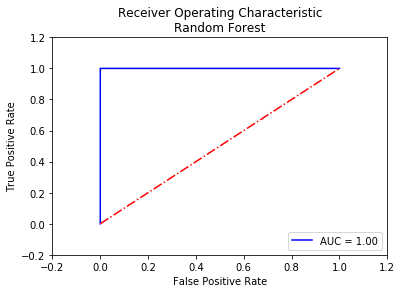

In [101]:
#Random Forest
from sklearn import metrics
y_rf_prob = rf_resampled.predict_proba(test_X)[:,1]

#Performance metrics evaluation
print("AUC:\n",metrics.roc_auc_score(test_Y,y_rf_prob))
auc = metrics.roc_auc_score(test_Y,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds= metrics.roc_curve(test_Y,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ROC-AUC score obtained with RandomForrestClassifier is 0.9999927596488385

**Neural Network Model -- using Keras -- sequential model -- features set after sampling will be used here**

In [102]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [103]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(train_X, train_Y, batch_size = 32, epochs = 100)

Epoch 1/100
12439/12439 [==============================] - 16s 1ms/step - loss: 0.0498 - accuracy: 0.9815
Epoch 2/100
12439/12439 [==============================] - 17s 1ms/step - loss: 0.0180 - accuracy: 0.9946
Epoch 3/100
12439/12439 [==============================] - 16s 1ms/step - loss: 0.0113 - accuracy: 0.9969
Epoch 4/100
12439/12439 [==============================] - 14s 1ms/step - loss: 0.0088 - accuracy: 0.9977
Epoch 5/100
12439/12439 [==============================] - 14s 1ms/step - loss: 0.0077 - accuracy: 0.9981
Epoch 6/100
12439/12439 [==============================] - 14s 1ms/step - loss: 0.0069 - accuracy: 0.9983
Epoch 7/100
12439/12439 [==============================] - 15s 1ms/step - loss: 0.0064 - accuracy: 0.9985
Epoch 8/100
12439/12439 [==============================] - 15s 1ms/step - loss: 0.0059 - accuracy: 0.9986
Epoch 9/100
12439/12439 [==============================] - 16s 1ms/step - loss: 0.0055 - accuracy: 0.9987
Epoch 10/100
12439/12439 [====================

12439/12439 [==============================] - 14s 1ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 78/100
12439/12439 [==============================] - 14s 1ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 79/100
12439/12439 [==============================] - 14s 1ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 80/100
12439/12439 [==============================] - 15s 1ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 81/100
12439/12439 [==============================] - 14s 1ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 82/100
12439/12439 [==============================] - 19s 2ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 83/100
12439/12439 [==============================] - 15s 1ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 84/100
12439/12439 [==============================] - 15s 1ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 85/100
12439/12439 [==============================] - 14s 1ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 86/100
12439/12439 [========================

In [104]:
# Predicting the Test set results
y_pred_seq = classifier.predict(test_X)
y_pred_seq = (y_pred_seq > 0.5)

In [ ]:
#train_X, test_X, train_Y, test_Y  variables after SMOTE sampling is performed

In [105]:
score = classifier.evaluate(test_X, test_Y)
score

5331/5331 [==============================] - 4s 773us/step - loss: 0.0036 - accuracy: 0.9995


[0.0036059594713151455, 0.9994548559188843]

In [107]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_Y, y_pred_seq)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[85056    93]
 [    0 85440]]


In [108]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(test_Y, y_pred_seq))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



Test Data Accuracy: 0.9995


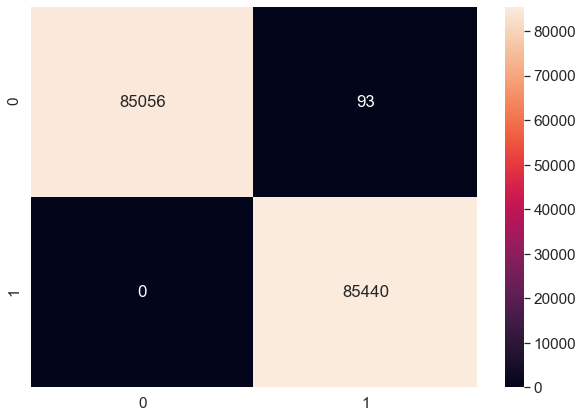

In [110]:
#Confusion Matrix
cm = confusion_matrix(test_Y, y_pred_seq) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(test_Y, y_pred_seq))

**Test data accuracy is 0.9995, classification report is presenting good results.**

**<center>Sampling Cross validation best estimators</center>**

In [ ]:
#X_train, X_test, y_train, y_test  -- variables on which sampling is not yet formed

In [112]:
# Create the cross validation framework 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

kf = StratifiedKFold(n_splits=5, random_state = None, shuffle = False)

In [7]:
#Remove comments to run install the imblearn library
#pip install imblearn smote-variants  # to address the problem of class imbalance

In [113]:
# Import the imbalance Learn module
from imblearn.pipeline import make_pipeline # Create a Pipeline using the provided estimators .
from imblearn.under_sampling import NearMiss  # perform Under-sampling  based on NearMiss methods. 
from imblearn.over_sampling import SMOTE  # PerformOver-sampling class that uses SMOTE. 
# import the metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
#pip install imblearn smote-variants  # to address the problem of class imbalance

*The below code can perform randomized or grid search on any given set of estimators and its params with/without using undersampling/oversampling and can return best estimators with performance metrics.*

In [115]:
def get_best_estimators_and_metrics(estimator, params, kf=kf, X_train=X_train, 
                                         y_train=y_train, X_test=X_test, 
                                         y_test=y_test, is_grid_search=True, 
                                         sampling=NearMiss(), scoring="f1", 
                                         n_jobs=2):
    if sampling is None:
        # make the pipeline of only the estimator, just so the remaining code will work fine
        pipeline = make_pipeline(estimator)
    else:
        # make the pipeline of over/undersampling and estimator
        pipeline = make_pipeline(sampling, estimator)
    # get the estimator name
    estimator_name = estimator.__class__.__name__.lower()
    # construct the parameters for grid/random search cv
    new_params = {f'{estimator_name}__{key}': params[key] for key in params}
    if is_grid_search:
        # grid search instead of randomized search
        search = GridSearchCV(pipeline, param_grid=new_params, cv=kf, return_train_score=True, n_jobs=n_jobs, verbose=2)
    else:
        # randomized search
        search = RandomizedSearchCV(pipeline, param_distributions=new_params, 
                                    cv=kf, scoring=scoring, return_train_score=True,
                                    n_jobs=n_jobs, verbose=1)
    # fit the model
    search.fit(X_train, y_train)
    cv_score = cross_val_score(search, X_train, y_train, scoring=scoring, cv=kf)
    # make predictions on the test data
    y_pred = search.best_estimator_.named_steps[estimator_name].predict(X_test)
    # calculate the metrics: recall, accuracy, F1 score, etc.
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_proba = search.best_estimator_.named_steps[estimator_name].predict_proba(X_test)[::, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    # return the best estimator along with the metrics
    return {
        "best_estimator": search.best_estimator_,
        "estimator_name": estimator_name,
        "cv_score": cv_score,
        "recall": recall,
        "accuracy": accuracy,
        "f1_score": f1,
        "fpr": fpr,
        "tpr": tpr,
        "auc": auc,
    }

Removing data causes underfitting because data is always not sufficient or of good quality to train a model. We can lose different trends when training data is lowered which can increase the bias/error. Therefore, we must devise a strategy to have enough data for model training and validation phase. 

The cross_val_score() function uses cross-validation to determine a score, which we're using in the function.

The function is made to be flexible. For example, if we want to perform a grid search on a LogisticRegression model with undersampling, we simply use it

*When passing None to the sampling param to the function get_best_estimators_and_metrics, it will disable undersampling.*

*Near Miss is used for undersampling which either merge or delete datapoints in the majority class. Samples are taken on the basis of distance between majority and minority class instances.*

In [116]:
# Cumulatively create a table for the ROC curve
## Create the dataframe
res_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'], dtype=object)

logreg_us_results = get_best_estimators_and_metrics(
    estimator=LogisticRegression(),
    params={"penalty": ['l1', 'l2'], 
                  'C': [ 0.01, 0.1, 1, 100], 
                  'solver' : ['liblinear']},
    sampling=NearMiss(),
)
print(f"==={logreg_us_results['estimator_name']}===")
print("Model:", logreg_us_results['best_estimator'])
print("Accuracy:", logreg_us_results['accuracy'])
print("Recall:", logreg_us_results['recall'])
print("F1 Score:", logreg_us_results['f1_score'])
res_table = res_table.append({'classifiers': logreg_us_results["estimator_name"],
                                        'fpr': logreg_us_results["fpr"], 
                                        'tpr': logreg_us_results["tpr"], 
                                        'auc': logreg_us_results["auc"]
                              }, ignore_index=True)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
===logisticregression===
Model: Pipeline(steps=[('nearmiss', NearMiss()),
                ('logisticregression',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])
Accuracy: 0.7351918823075032
Recall: 0.9081632653061225
F1 Score: 0.011662953741318307


Use a 5-fold cross-validation on the training set.
On each of the folds, use undersampling.
Fit the model on the training folds and validate on the validation fold.

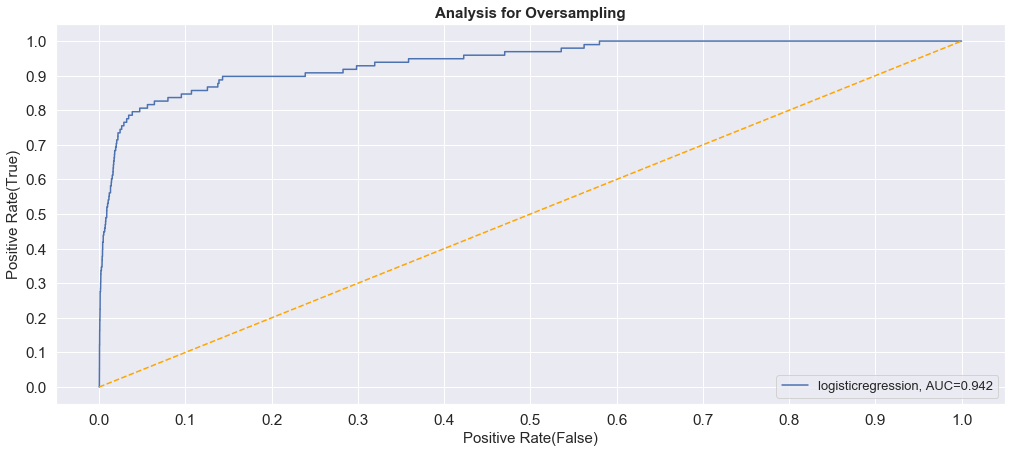

In [117]:
# Plot the ROC curve for undersampling
res_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(17,7))

for j in res_table.index:
    plt.plot(res_table.loc[j]['fpr'], 
             res_table.loc[j]['tpr'], 
             label="{}, AUC={:.3f}".format(j, res_table.loc[j]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Positive Rate(False)", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Positive Rate(True)", fontsize=15)
plt.title('Analysis for Oversampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

In [118]:
# Cumulatively create a table for the ROC curve
res_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'], dtype=object)

lin_reg_os_results = get_best_estimators_and_metrics(
    estimator=LogisticRegression(),
    params={"penalty": ['l1', 'l2'], 'C': [ 0.01, 0.1, 1, 100, 100], 
            'solver' : ['liblinear']},
    sampling=SMOTE(random_state=42),
    scoring="f1",
    is_grid_search=False,
    n_jobs=2,
)
print(f"==={lin_reg_os_results['estimator_name']}===")
print("Model:", lin_reg_os_results['best_estimator'])
print("Accuracy:", lin_reg_os_results['accuracy'])
print("Recall:", lin_reg_os_results['recall'])
print("F1 Score:", lin_reg_os_results['f1_score'])
res_table = res_table.append({'classifiers': lin_reg_os_results["estimator_name"],
                                        'fpr': lin_reg_os_results["fpr"], 
                                        'tpr': lin_reg_os_results["tpr"], 
                                        'auc': lin_reg_os_results["auc"]
                              }, ignore_index=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
===logisticregression===
Model: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('logisticregression',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])
Accuracy: 0.9753519890453285
Recall: 0.9183673469387755
F1 Score: 0.11363636363636363


*It can be clearly observed that applying SMOTE increases accuracy and Recall of the model with the best parameters passed to get best estimators and metrics function. Here the best metrics we are getting are Recall: 0.918, Accuracy: 0.97, C=0.01, penalty=l1).*

**<center> Outliers detection and Removal</center>**

*Though we are not removing outliers from the original set because we are using different techniques to overcome outliers, but here we are removing outliers by replicating original dataset.*

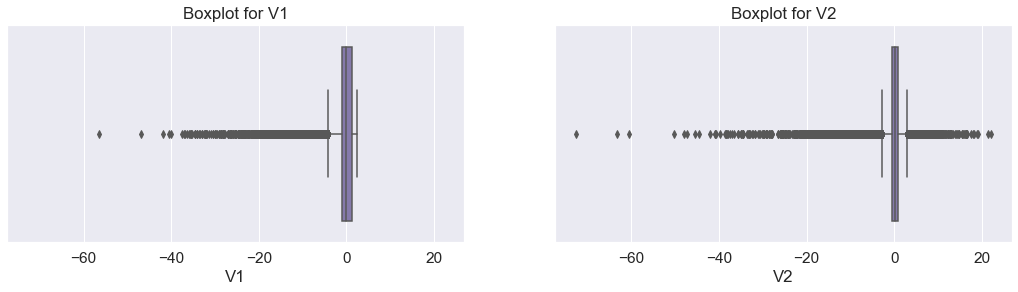

In [119]:
# boxplot for two features in the dataset

creditcard_df_copy = creditcard_df

f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

variable1 = creditcard_df_copy["V1"]
variable2 = creditcard_df_copy["V2"]

sns.boxplot(variable1, color="m", ax=axes[0]).set_title('Boxplot for V1')
sns.boxplot(variable2, color="m", ax=axes[1]).set_title('Boxplot for V2')

plt.show()

In [120]:
# Find the IQR for all the feature variables

quartile1 = creditcard_df_copy.quantile(0.25)
quartile3 = creditcard_df_copy.quantile(0.75)

IQR = quartile3 - quartile1
print(IQR)

V1                     2.236015
V2                     1.402274
V3                     1.917560
V4                     1.591981
V5                     1.303524
V6                     1.166861
V7                     1.124512
V8                     0.535976
V9                     1.240237
V10                    0.989349
V11                    1.502088
V12                    1.023810
V13                    1.311044
V14                    0.918724
V15                    1.231705
V16                    0.991333
V17                    0.883423
V18                    0.999657
V19                    0.915248
V20                    0.344762
V21                    0.414772
V22                    1.070904
V23                    0.309488
V24                    0.794113
V25                    0.667861
V26                    0.567936
V27                    0.161885
V28                    0.131240
Class                  0.000000
Standardized_Amount    0.286123
Standardized_Time      1.792429
dtype: f

In [123]:
# Remove the outliers 
constant = 3
datavalid = creditcard_df_copy[~((creditcard_df_copy < (quartile1 - constant * IQR)) |(creditcard_df_copy > (quartile3 + constant * IQR))).any(axis=1)]
deletedrows = creditcard_df_copy.shape[0] - datavalid.shape[0]
print("Removed " + str(deletedrows) + " rows from the data as outliers")

Removed 53376 rows from the data as outliers


**This is the end of the first dataset, the purpose of the whole cycle was to look for patterns and trends in the data, cleaning the data, applying normalization/standardization. Applied machine learning algorithms. Sampling has been applied to overcome class imbalance issues. Smote sampling and NearMiss sampling techniques have been applied successfully. Logistic regression, decision trees, random forest and Sequntial ANN model has been applied on imbalanced and balanced data and learning process was evaluated briefly on different metrics such as Recall, Precision, Accuracy, AUC, ROC curves.**

.

<center><font size="6">Fraud Detection Analysis- Dataset 2 from Kaggle</font> </center>

*This is the second dataset taken from kaggle. Data files are large and cannot be uploaded to faser. Therefore, files have been placed on google drive and link is provided in this file. There are two files which are been explored in detail. These files are 1)fraudTrain.csv 2)fraudTest.csv. The files contains different features. Exploratory data analysis is perfomed in detail and trends have been visualized. The dataset is a simulated credit card transactions data containing both fraudulent and legal transactions from a period Jan 2019 till 31st DEC 2020. It has data of over 1000 customers transactions with a pool of 800 merchants.* 
References: 
*https://www.kaggle.com/code/anuragsinghtomar/capstone-credit-card-fraud-detection/data*
*https://www.Kaggle.com* *https://stackoverflow.com/*
https://drive.google.com/drive/folders/1hyt-VXeMy9qlCMtRaCZyh5qpK_Df3aY6?usp=sharing    #project data is on google drive and can be accessed publicly

# Fraud Detection: Wrangling & EDA Dataset 2

In [126]:
import warnings
warnings.filterwarnings("ignore")

## 1. Loading Data & Basic Analysis

- **Task** :Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [127]:
data_train = pd.read_csv('fraudTrain.csv')
data_test = pd.read_csv('fraudTest.csv')

In [131]:
train_df = data_train.copy()
test_df = data_test.copy()

In [132]:
train_df.shape

(1296675, 23)

In [133]:
test_df.shape

(555719, 23)

In [134]:
train_df.head(2).append(train_df.tail(2))

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [135]:
#Check for null values
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [136]:
# Find the data types of columns
train_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [137]:
print(train_df.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [138]:
print(test_df.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [139]:
# Find the basic statistics
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [140]:
#cc_num columns
train_df.cc_num.value_counts()

571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: cc_num, Length: 983, dtype: int64

In [141]:
# dropping trans_num as it is showing no unique pattern
train_df = train_df.drop("trans_num",1)

In [142]:
train_df["first"].value_counts()

Christopher    26669
Robert         21667
Jessica        20581
James          20039
Michael        20009
               ...  
Cameron            9
Phyllis            8
Molly              8
Angelica           7
Samantha           7
Name: first, Length: 352, dtype: int64

In [143]:
train_df["last"].value_counts()

Smith        28794
Williams     23605
Davis        21910
Johnson      20034
Rodriguez    17394
             ...  
Wells            9
Peterson         9
Strong           8
Schaefer         7
Blake            7
Name: last, Length: 481, dtype: int64

In [144]:
# First and last names are not unique so we will drop them and will use cc_num to distinguish customers
train_df = train_df.drop(columns=["first","last"])

In [145]:
# We can use unix_time column to find the recency of same cc_number transactions
train_df["recency"] = train_df.groupby(by="cc_num")["unix_time"].diff()

In [146]:
# examining null values of recency columns
train_df["recency"].isnull().sum()

983

In [147]:
#The null values are getting are 983, it is because there are 983 unique cards so whenever cc_num group changes, python fill first entry of new group as null
train_df.loc[train_df.recency.isnull(),["recency"]]

,recency
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1186804,NaN
1190005,NaN
1230734,NaN
1258483,NaN


In [148]:
# due to above we are initializing recency value to -1
train_df.loc[train_df.recency.isnull(),["recency"]] = -1

In [149]:
#examining null values again
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
recency                  0
dtype: int64

In [150]:
# converting trans_date_trans_time to datetime
train_df["trans_date_trans_time"] = pd.to_datetime(train_df["trans_date_trans_time"])

In [151]:
train_df.trans_date_trans_time.head()

0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
3   2019-01-01 00:01:16
4   2019-01-01 00:03:06
Name: trans_date_trans_time, dtype: datetime64[ns]

In [152]:
# dropping unix feature as is not required anymore
train_df= train_df.drop("unix_time",1)

In [153]:
# dropping Unnamed: 0 as it the the index and we already have it
train_df = train_df.drop(columns=["Unnamed: 0"])

In [154]:
# examining dob column
train_df.dob.value_counts()

1977-03-23    5636
1981-08-29    4636
1988-09-15    4623
1955-05-06    3661
1995-07-12    3123
              ... 
1944-06-17       7
1970-06-25       7
1962-03-14       7
1960-10-28       7
1999-10-26       7
Name: dob, Length: 968, dtype: int64

In [155]:
# dob is not significant in finding frauds, so we will drop it
train_df = train_df.drop("dob",1)

In [156]:
# finding the customer's and merchant's location difference, it can be helpful in knowing more about fraud transaction
train_df["lat_diff"] = abs(train_df.lat - train_df.merch_lat)
train_df["long_diff"] = abs(train_df["long"] - train_df["merch_long"])
print(train_df["lat_diff"])
print(train_df["long_diff"])

0          0.067507
1          0.271247
2          0.969904
3          0.803731
4          0.254299
             ...   
1296670    0.876234
1296671    0.359819
1296672    0.679913
1296673    0.563660
1296674    0.722683
Name: lat_diff, Length: 1296675, dtype: float64
0          0.870215
1          0.024038
2          0.107519
3          0.447271
4          0.830441
             ...   
1296670    0.786935
1296671    0.736428
1296672    0.688371
1296673    0.700060
1296674    0.311310
Name: long_diff, Length: 1296675, dtype: float64


In [157]:
# applying pythogoras theorem to find the displacement/distance from the locations
# multiplying with 110 because each degree of longitude and lattitude is 110 kilometers apart
train_df["displacement"] = np.sqrt(pow((train_df["lat_diff"]*110),2) + pow((train_df["long_diff"]*110),2))

In [160]:
# now we will remove the following columns as we have displacement now
train_df = train_df.drop(columns = ["lat","long","merch_lat","merch_long","lat_diff","long_diff"])

In [161]:
# we are dropping street, city and zip columns as we can get them froms state
# we can use population param to find fraud cases, so removing them

train_df= train_df.drop(columns = ["city","zip","street"])
train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'city_pop', 'job', 'is_fraud', 'recency',
       'displacement'],
      dtype='object')

In [162]:
# displacement column statistics
train_df.displacement.describe()

count    1.296675e+06
mean     8.422272e+01
std      3.132233e+01
min      2.625292e-02
25%      6.214537e+01
50%      8.781422e+01
75%      1.075289e+02
max      1.554701e+02
Name: displacement, dtype: float64

In [163]:
# now we can bin the displacement into near, far and very far records
# if merchant lies between the range of 0-45 then it is near, while above 45 but below 90 will be far and rest can be very far

# Now we will bin the displacement parameter to categorize it based on merchant's range
# 0-50 = 'Near'
# 50+ & below 100  = 'Far Away'
# 100+  = 'Far Enough'

train_df['location'] = ''
train_df.loc[(train_df["displacement"] < 50),["location"]] = "Near by"
train_df.loc[((train_df["displacement"] > 51) & (train_df["displacement"] < 100)),["location"]] = "Far Away"
train_df.loc[(train_df["displacement"] > 100),["location"]] = "Far Enough"
train_df.location.unique()

array(['Far Away', 'Near by', 'Far Enough', ''], dtype=object)

In [164]:
# examining location column
train_df.location.value_counts(normalize = True)

Far Away      0.480134
Far Enough    0.351272
Near by       0.162183
              0.006410
Name: location, dtype: float64

In [165]:
# deriving time column as date part is not that important
train_df["Time"] = pd.to_datetime(train_df["trans_date_trans_time"],"%H:%M").dt.time

In [166]:
train_df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,city_pop,job,is_fraud,recency,displacement,location,Time
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,3495,"Psychologist, counselling",0,-1.0,96.011245,Far Away,00:00:18
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,149,Special educational needs teacher,0,-1.0,29.954105,Near by,00:00:44


In [167]:
# converting Time column to datetime
train_df["Time"] = pd.to_datetime(train_df["trans_date_trans_time"]).dt.hour

In [168]:
train_df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,city_pop,job,is_fraud,recency,displacement,location,Time
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,3495,"Psychologist, counselling",0,-1.0,96.011245,Far Away,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,149,Special educational needs teacher,0,-1.0,29.954105,Near by,0


In [169]:
# division of city_population as less dense, adequately densed, densely populated
train_df['city_pop_division'] = ''
train_df.loc[(train_df["city_pop"] < 15000),["city_pop_division"]] = "Less Dense"
train_df.loc[((train_df["city_pop"] > 15000) & (train_df["city_pop"] < 55000)),["city_pop_division"]] = "Adequately Dense"
train_df.loc[(train_df["city_pop"] > 55000),["city_pop_division"]] = "Densely populated"

In [170]:
# examining constitution of each division
train_df.city_pop_division.value_counts(normalize = True)

Less Dense           0.724458
Densely populated    0.176916
Adequately Dense     0.098627
Name: city_pop_division, dtype: float64

In [171]:
# dropping column city_pop 
train_df = train_df.drop("city_pop",1)

In [172]:
# recency feature division into many parts with respect to time duration
train_df.recency = train_df.recency.apply(lambda r: float((r/60)/60))

In [173]:
# partitioning recency into different parts based on duration( number of hours )
train_df['recency_division'] = ''
train_df.loc[(train_df["recency"] < 1),["recency_division"]] = "Latest Transactions"
train_df.loc[((train_df["recency"] > 1) & (train_df["recency"] < 7)),["recency_division"]] = "Transactions within 6 hours"
train_df.loc[((train_df["recency"] > 7) & (train_df["recency"] <= 12)),["recency_division"]] = "Transactions after 7 hours"
train_df.loc[((train_df["recency"] > 12) & (train_df["recency"] <= 24)),["recency_division"]] = "Transactions after 12 hours"
train_df.loc[(train_df["recency"] > 24),["recency_division"]] = "Transactions after 24 hours"
train_df.loc[(train_df["recency"] < 0),["recency_division"]] = "Current Transactions"
train_df.recency_division.value_counts(normalize = True)

Transactions within 6 hours    0.456496
Latest Transactions            0.163705
Transactions after 12 hours    0.148905
Transactions after 7 hours     0.146961
Transactions after 24 hours    0.083119
Current Transactions           0.000758
                               0.000056
Name: recency_division, dtype: float64

In [174]:
# examining category column
train_df.category.value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

In [175]:
# examining merchant column
train_df.merchant.value_counts()

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64

- ***Test dataset Task*** :Working on test dataset to find **shape, data types, basic statistics, and null values** 

In [176]:
test_df.head(2).append(test_df.tail(2))

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [177]:
# we cannot work on trans_num as there is no unique pattern, so dropping it
test_df = test_df.drop("trans_num",1)

In [178]:
# We will drop them as per train dataset logic
test_df = test_df.drop(columns=["first","last"])

In [179]:
test_df["recency"] = test_df.groupby(by="cc_num")["unix_time"].diff()

In [180]:
#Assigning -1 as per above logic in train dataset
test_df.loc[test_df.recency.isnull(),["recency"]] = -1

In [181]:
# converting trans_date_trans_time to datetime
test_df["trans_date_trans_time"] = pd.to_datetime(test_df["trans_date_trans_time"])

In [182]:
# we now do not need unix_time anymore so so we can drop it
test_df = test_df.drop("unix_time",1)

In [183]:
# dropping for the same reason
test_df = test_df.drop(columns=["Unnamed: 0"])

In [184]:
# in predicting customer frauds, dob doesn't play any role that whether there will be a fraud with customer or not, so removing dob column too
test_df = test_df.drop("dob",1)

In [185]:
# same as for train dataset
test_df["lat_diff"] = abs(test_df.lat - test_df.merch_lat)
test_df["long_diff"] = abs(test_df["long"] - test_df["merch_long"])

In [186]:
test_df["displacement"] = np.sqrt(pow((test_df["lat_diff"]*110),2) 
                                  + pow((test_df["long_diff"]*110),2))

In [187]:
test_df = test_df.drop(columns = ["lat","long","merch_lat","merch_long","lat_diff","long_diff"])

In [188]:
test_df = test_df.drop(columns = ["city","zip","street"])

In [189]:
test_df['location'] = ''
test_df.loc[(test_df["displacement"] < 50),["location"]] = "Near by"
test_df.loc[((test_df["displacement"] >= 51) & (test_df["displacement"] <= 100)),["location"]] = "Far Away"
test_df.loc[(test_df["displacement"] > 100),["location"]] = "Far Enough"
test_df.location.unique()

array(['Near by', 'Far Enough', 'Far Away', ''], dtype=object)

In [190]:
test_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'city_pop', 'job', 'is_fraud', 'recency',
       'displacement', 'location'],
      dtype='object')

In [191]:
test_df["Time"] = pd.to_datetime(test_df["trans_date_trans_time"],"%H:%M").dt.time

In [192]:
# converting Time column to datetime
test_df["Time"] = pd.to_datetime(test_df["trans_date_trans_time"]).dt.hour

In [193]:
# division of city_population as less dense, adequately densed, densely populated
test_df['city_pop_division'] = ''
test_df.loc[(test_df["city_pop"] < 15000),["city_pop_division"]] = "Less Dense"
test_df.loc[((test_df["city_pop"] > 15000) & (test_df["city_pop"] < 55000)),["city_pop_division"]] = "Adequately Dense"
test_df.loc[(test_df["city_pop"] > 55000),["city_pop_division"]] = "Densely populated"

In [194]:
# dropping column city_pop as it is of no use now
test_df = test_df.drop("city_pop",1)

In [195]:
test_df.recency = test_df.recency.apply(lambda r: float((r/60)/60))

In [196]:
# partitioning recency into different parts based on duration( number of hours )
test_df['recency_division'] = ''
test_df.loc[(test_df["recency"] < 1),["recency_division"]] = "Latest Transactions"
test_df.loc[((test_df["recency"] > 1) & (test_df["recency"] < 7)),["recency_division"]] = "Transactions within 6 hours"
test_df.loc[((test_df["recency"] > 7) & (test_df["recency"] <= 12)),["recency_division"]] = "Transactions after 7 hours"
test_df.loc[((test_df["recency"] > 12) & (test_df["recency"] <= 24)),["recency_division"]] = "Transactions after 12 hours"
test_df.loc[(test_df["recency"] > 24),["recency_division"]] = "Transactions after 24 hours"
test_df.loc[(test_df["recency"] < 0),["recency_division"]] = "Current Transactions"
test_df.recency_division.value_counts(normalize = True)

Transactions within 6 hours    0.482093
Latest Transactions            0.189869
Transactions after 7 hours     0.138270
Transactions after 12 hours    0.126801
Transactions after 24 hours    0.061232
Current Transactions           0.001663
                               0.000072
Name: recency_division, dtype: float64

In [197]:
train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'job', 'is_fraud', 'recency', 'displacement',
       'location', 'Time', 'city_pop_division', 'recency_division'],
      dtype='object')

In [198]:
test_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'job', 'is_fraud', 'recency', 'displacement',
       'location', 'Time', 'city_pop_division', 'recency_division'],
      dtype='object')

###  Exploration -- Univariate/Multivariate Analysis  

In [199]:
train_df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,job,is_fraud,recency,displacement,location,Time,city_pop_division,recency_division
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,"Psychologist, counselling",0,-0.000278,96.011245,Far Away,0,Less Dense,Current Transactions
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,Special educational needs teacher,0,-0.000278,29.954105,Near by,0,Less Dense,Current Transactions


In [200]:
# splitting dataset into fraud cases to analyze trends
fraud_cases = train_df[train_df["is_fraud"]==1]

**Task: examining fraud transactions peak hours**

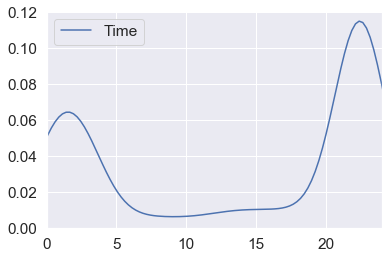

In [201]:
sns.kdeplot(fraud_cases["Time"])
plt.xlim(left = 0,right = 24)
plt.show()

*It can be observed that fraud transactions happened mostly at night time from around 6:00 P.M. to 5:00 A.M. This time period should be examined more with customer.*

**Task: examining fraudulent activities with respect to city population divisions**

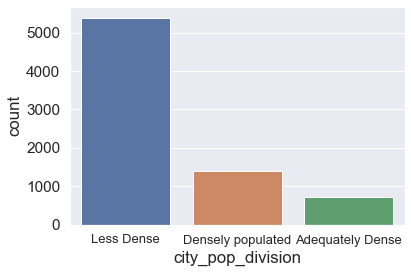

In [202]:
sns.countplot(x = fraud_cases["city_pop_division"], data = fraud_cases)
plt.xticks(size=13)
plt.show()

*It can be observed that less dense areas are more vulnerable and prone to fraud.*

**Task: state-wise fraud transactions**

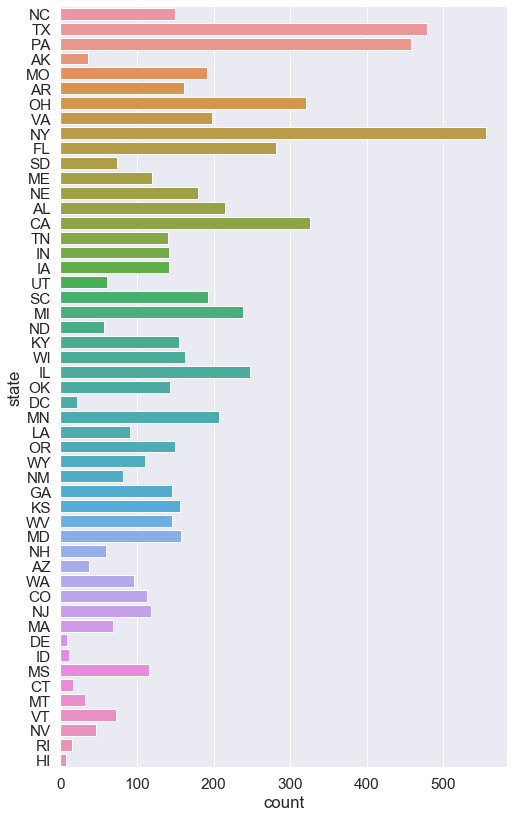

In [203]:

plt.figure(figsize = [8,14])
sns.countplot(y=fraud_cases.state)
plt.show()

*we can see the most number of frauds are done in New York, Texas and Pennsylvania, California and Ohio respectively.*

In [204]:
fraud_cases.trans_date_trans_time

2449      2019-01-02 01:06:37
2472      2019-01-02 01:47:29
2523      2019-01-02 03:05:23
2546      2019-01-02 03:38:03
2553      2019-01-02 03:55:47
                  ...        
1295399   2020-06-21 01:00:08
1295491   2020-06-21 01:53:35
1295532   2020-06-21 02:16:56
1295666   2020-06-21 03:26:20
1295733   2020-06-21 03:59:46
Name: trans_date_trans_time, Length: 7506, dtype: datetime64[ns]

In [205]:
fraud_cases.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'job', 'is_fraud', 'recency', 'displacement',
       'location', 'Time', 'city_pop_division', 'recency_division'],
      dtype='object')

**Task: let's analyze the the date when maximum frauds have happened**

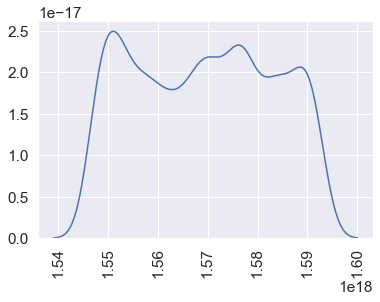

In [206]:
sns.kdeplot(fraud_cases.trans_date_trans_time.values.astype(float))
plt.xticks(rotation = 90)
plt.show()

*The most number of frauds were done at initial period from 1.55 onwards.*

**Task: examining fraud transactions based on recency**

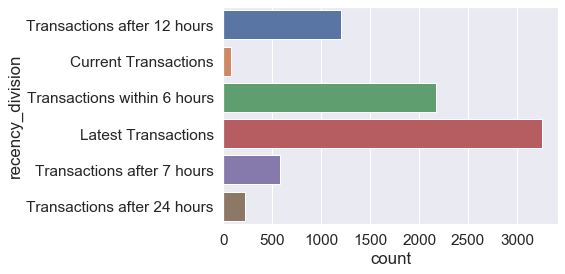

In [207]:
sns.countplot(y=fraud_cases.recency_division)
plt.show()

*Latest transactions are more prone to fraud while current transactions are least prone to fraud*

**Task: let's analyze overall recent transactions**

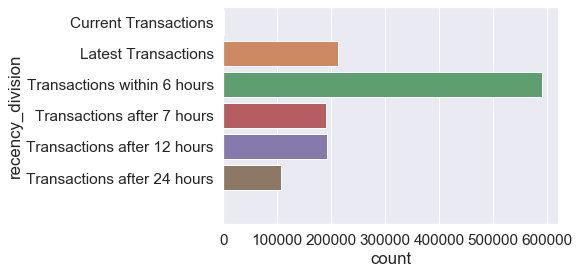

In [208]:
sns.countplot(y=train_df.recency_division)
plt.show()

*Transactions which are latest can be seen as more fraud though less in number as a whole. Other recency segmentations like after half day or within 6 hours transactions are fraud because maybe customer has done more than 1 transactions per day or night. As we noticed earlier that peak hours of fraud are at night time.*

**Task: analyzing how recent the transaction can be termed as fraud.**

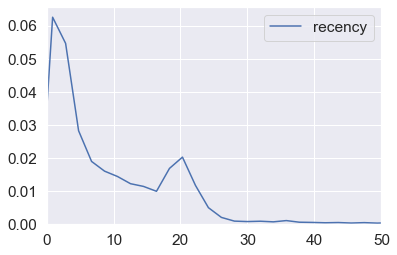

In [209]:
sns.kdeplot(fraud_cases.recency)
plt.xlim(right = 50,left = 0)
plt.show()

*So, it can be termed that transactions happened within 1 to 2 hours have high chances of being fraud.*

In [210]:
fraud_cases["recency_division"].value_counts()

Latest Transactions            3258
Transactions within 6 hours    2169
Transactions after 12 hours    1205
Transactions after 7 hours      579
Transactions after 24 hours     220
Current Transactions             75
Name: recency_division, dtype: int64

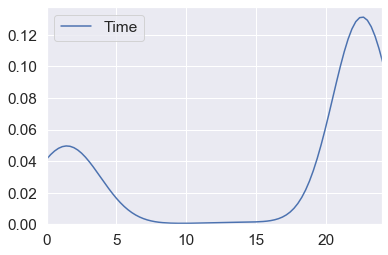

In [211]:
sns.kdeplot(fraud_cases[fraud_cases["recency_division"] == "Latest Transactions"].Time)
plt.xlim(left=0,right=24)
plt.show()

We can see that most of the transactions, which were done within one hour with the same card, were done in the peak hours, when fraud transactions were done

In [212]:
# examining current transactions completed through credit cards.
round((fraud_cases[train_df["recency_division"] == "Current Transactions"]["is_fraud"].sum()/len(train_df[train_df["recency"] < 0]["is_fraud"]))*100, 2)

7.63

*There are 7-8% recent transactions which are labelled as fraud, initial transactions build customer's image, so great care should be taken care of by implementing special checks.*

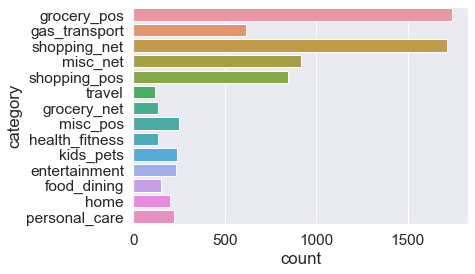

In [213]:
# examining the categoried which are prone to highest number of frauds.
sns.countplot(y=fraud_cases.category)
plt.show()

*Grocery and net/online shopping having highest number of frauds.*

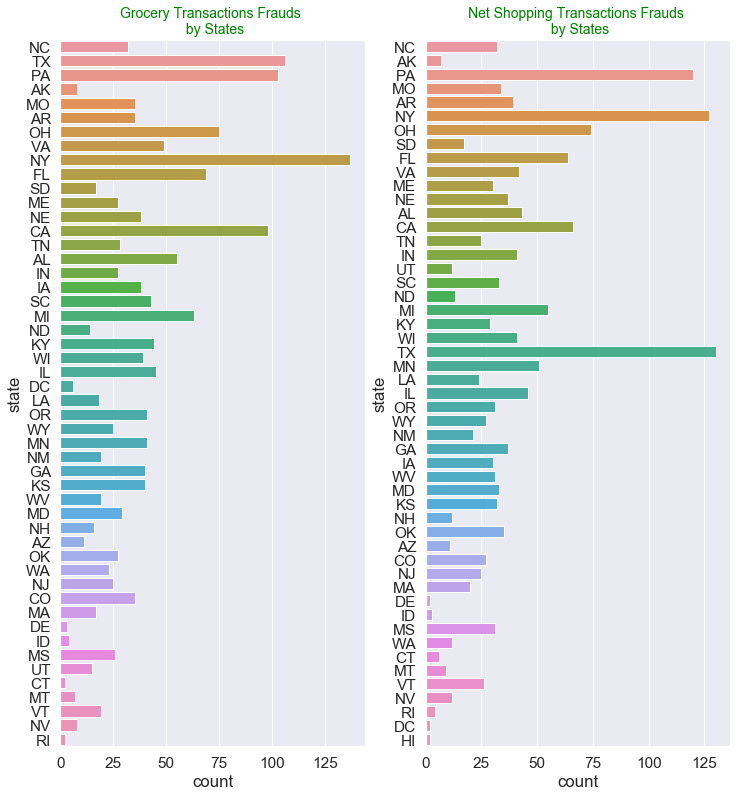

In [214]:
# let's examine grocery & shopping frauds state wise
plt.figure(figsize=[12,13])

plt.subplot(122)
sns.countplot(y=fraud_cases[fraud_cases.category == "shopping_net"].state)
plt.title(label = "Net Shopping Transactions Frauds \n by States", 
          fontdict = {"color": "green", "size": 14, "weight" : "4"})

plt.subplot(121)
sns.countplot(y = fraud_cases[fraud_cases.category == "grocery_pos"].state)
plt.title(label = "Grocery Transactions Frauds \n by States", 
          fontdict = {"color": "green", "size": 14, "weight" : "4"})
plt.show()

*In grocery transactions New York leads the graph by a huge margin followed by Texas & Pennsylvania and California while in online shopping transactions Texas leads the graph followed by New York, Pennsylvania and OHIO by a very less margin.*

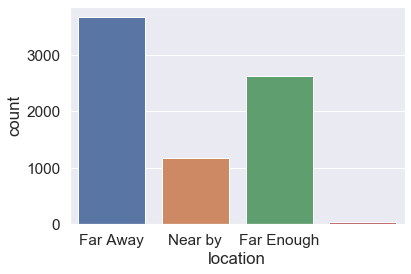

In [215]:
# let's examine how far frauds happens from customer's place
sns.countplot(fraud_cases.location)
plt.show()

*There are more fraud cases if customer's location is far away from merchant's area.*

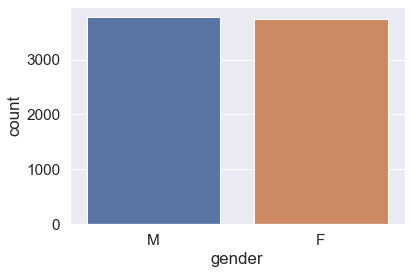

In [216]:
# Gender based fraud transactions
sns.countplot(fraud_cases.gender)
plt.show()

We can see that both are equally vulnerable to fraud transactions

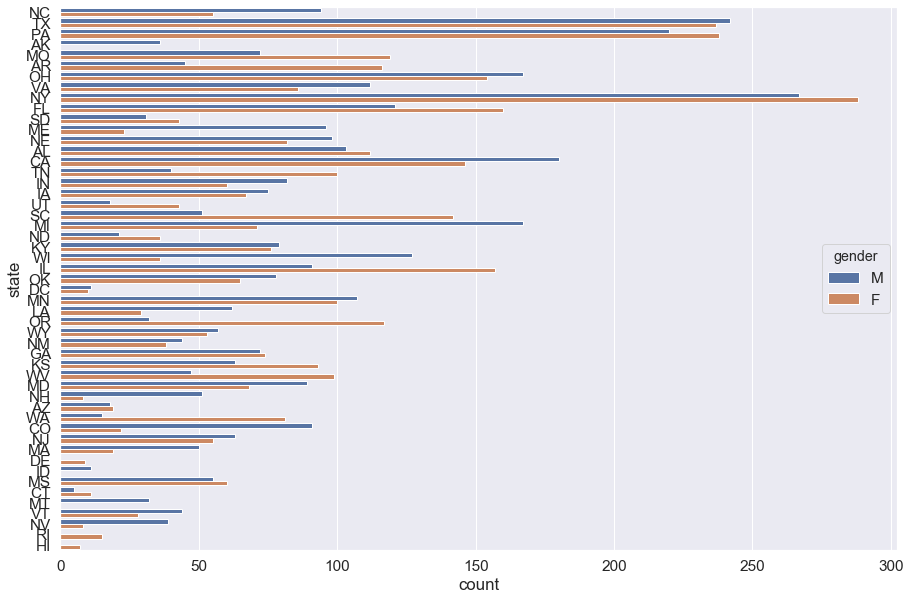

In [217]:
# Let's see the above graph through states
plt.figure(figsize = [15,10])
sns.countplot(y = fraud_cases.state, hue = fraud_cases.gender)
plt.show()

We can see that New York which have highest number of frauds happenning in the state, females are more vulnerable from fraud_attacks, followed by Texas, pennsalvania, OHIO too both male and female are vulnerable. California and MI male are more vulnerable to frauds.

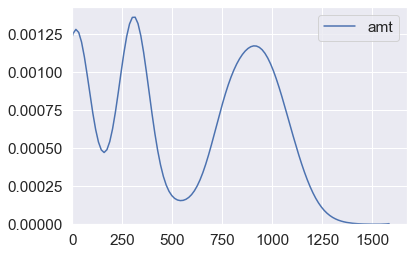

In [218]:
#Examining frauds with respect to amount of the transactions.
sns.kdeplot(fraud_cases.amt)
plt.xlim(left = 0)
plt.show()

*More frauds are happening from the amount range of  200− 450  and 700-1000 as can be seen in the graph above.*

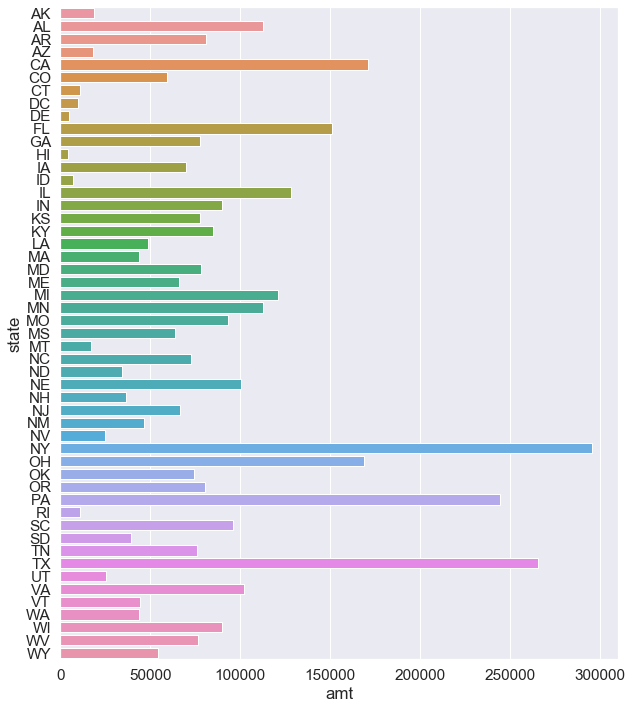

In [221]:
# examining loses on state wise
data_state = fraud_cases.groupby(by = "state").sum() 
plt.figure(figsize=[10,12]),
sns.barplot(y = data_state.index,x=data_state.amt)
plt.show()

*Highest losses are from New York*

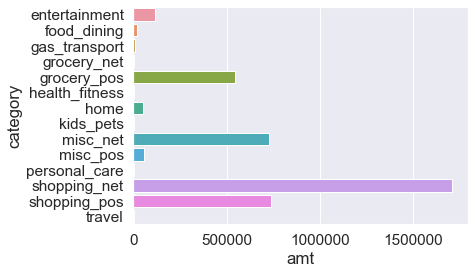

In [222]:
# examining category wise loses 
category_wise_loses = fraud_cases.groupby(by = "category").sum()

sns.barplot(y = category_wise_loses.index, x = category_wise_loses.amt)
plt.show()

*It can be observed from the above graph that online shopping category has huge losses, like more than $1.5 million.* 

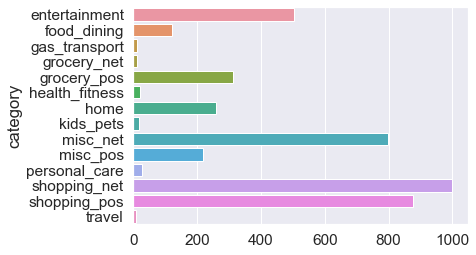

,Category,Ticket Size
11,shopping_net,999.254939
12,shopping_pos,876.921815
8,misc_net,797.012852
0,entertainment,503.535579
4,grocery_pos,311.989616
6,home,257.432626
9,misc_pos,218.284080
1,food_dining,120.076954
10,personal_care,26.170545
5,health_fitness,20.248421


In [223]:
# examining an mean/avg ticket size of fraudulent transaction in different categories. 
sns.barplot(y = category_wise_loses.index, x = (category_wise_loses.amt/category_wise_loses.is_fraud))
plt.show()

data_ticket = pd.DataFrame({"Category" : category_wise_loses.index,"Ticket Size": category_wise_loses.amt/category_wise_loses.is_fraud})
data_ticket.reset_index(inplace=True)
data_ticket.drop("category",1,inplace=True)
data_ticket.sort_values(by="Ticket Size",ascending=False)

*It can be observed that highest fraudulent transactions are coming from shopping category followed by misc and entertainment, from these huge amount is withdrawn as a result of fraudulent transactions.*

# Machine Learning

**Model Building**

**Creating Dummy Variables / one hot encoding**

In [225]:
train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'job', 'is_fraud', 'recency', 'displacement',
       'location', 'Time', 'city_pop_division', 'recency_division'],
      dtype='object')

In [226]:
# we will drop "merchant","job","trans_date_trans_time" columns to avoid model complexity and multicollinearity,
# also we need to drop unique identifiers columns because they do not contribute in fraud prediction
# state column will be dropped to avoid creating lots of dummy variables. Furthermore there are states which have less fraud cases, so because of class imbalance those variables can raise unwanted cases

data_tr1 = train_df.drop(columns=["trans_date_trans_time","cc_num","job","state","merchant"]) 
data_tr2 = pd.get_dummies(data=data_tr1,columns=["category","gender","recency_division","city_pop_division","location"], drop_first=True)

# assigning them to test dataset

data_tst1 = test_df.drop(columns=["trans_date_trans_time","cc_num","merchant","job","state"])
data_tst2 = pd.get_dummies(data=data_tst1,columns=["category","gender","recency_division","city_pop_division","location"], drop_first=True)

**Normalizing the data**

In [227]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [228]:
data_tr2[["amt","Time","displacement","recency"]] = sc.fit_transform(data_tr2[["amt","Time","displacement","recency"]])

In [229]:
data_tr2.head()

,amt,is_fraud,recency,displacement,Time,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,...,recency_division_Latest Transactions,recency_division_Transactions after 12 hours,recency_division_Transactions after 24 hours,recency_division_Transactions after 7 hours,recency_division_Transactions within 6 hours,city_pop_division_Densely populated,city_pop_division_Less Dense,location_Far Away,location_Far Enough,location_Near by
0,-0.407826,0,-0.685836,0.376362,-1.878145,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0.230039,0,-0.685836,-1.732586,-1.878145,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0.934149,0,-0.685836,0.738140,-1.878145,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,-0.158132,0,-0.685836,0.541322,-1.878145,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,-0.177094,0,-0.685836,0.361173,-1.878145,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


**Separating the target variable**

In [230]:
y = data_tr2.is_fraud[:]
x = data_tr2.drop("is_fraud", 1)

**Building Model**

*We will be using statsmodels.api which is a python module having classes and functions for estimation of stats models, and conducting many statistical tests and exploring data. For each estimator results statistics are available which we will explore here:*

In [232]:
# importing libraries
import statsmodels.api as sm

model_1 = sm.GLM(y,sm.add_constant(x),family = sm.families.Binomial())

In [233]:
# fitting model and examing results
result1 = model_1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:              1296675
Model:                            GLM   Df Residuals:                  1296645
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 20 Apr 2022   Deviance:                          inf
Time:                        12:15:43   Pearson chi2:                 2.26e+16
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -6.3505      1.152     -5.514      0.000      -8.608      -4.093
amt                                              0.3438      0.004     83.486      0.000       0.336       0.352
recency                                          0.0054      0.016      0.342      0.732      -0.026       0.036
displacement                                    -0.0033      0.018     -0.187      0.852      -0.038       0.032
Time                                             0.4577      0.010     44.877      0.000       0.438       0.478
category_food_dining                            -0.1039      0.043     -2.418      0.016      -0.188      -0.020
category_gas_transport                           1.0377      0.041     25.051      0.000       0.956       1.119
category_grocery_net                             0.8762      0.054     16.108      0.000       0.770       0.983
category_grocery_pos                             1.6528      0.039     42.052      0.000       1.576       1.730
category_health_fitness                         -0.1913      0.044     -4.364      0.000      -0.277      -0.105
category_home                                   -0.1860      0.040     -4.637      0.000      -0.265      -0.107
category_kids_pets                              -0.1133      0.041     -2.785      0.005      -0.193      -0.034
category_misc_net                                1.4170      0.042     33.442      0.000       1.334       1.500
category_misc_pos                                0.3391      0.044      7.713      0.000       0.253       0.425
category_personal_care                          -0.0476      0.043     -1.113      0.266      -0.131       0.036
category_shopping_net                            1.0812      0.037     28.922      0.000       1.008       1.154
category_shopping_pos                            0.3855      0.039      9.937      0.000       0.309       0.462
category_travel                                 -0.9157      0.058    -15.745      0.000      -1.030      -0.802
gender_M                                         0.1981      0.015     13.231      0.000       0.169       0.227
recency_division_Current Transactions            2.9770      1.153      2.581      0.010       0.716       5.238
recency_division_Latest Transactions             1.3350      1.147      1.164      0.245      -0.914       3.583
recency_division_Transactions after 12 hours     0.7460      1.147      0.650      0.516      -1.503       2.995
recency_division_Transactions after 24 hours     0.3010      1.148      0.262      0.793      -1.950       2.552
recency_division_Transactions after 7 hours      0.3821      1.147      0.333      0.739      -1.867       2.631
recency_division_Transactions wi

*From the above there are some insignificant features as their p value is greater than 0.05, we will apply recursive feature eleimination technique to remove them to find best features*

In [234]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [235]:
logregr = LogisticRegression()
rfe = RFE(estimator = logregr, n_features_to_select= 20)
rfe_res = rfe.fit(x,y)

In [236]:
# columns selected by RFE
x.columns[rfe_res.support_]

Index(['amt', 'Time', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M',
       'recency_division_Current Transactions',
       'recency_division_Transactions after 12 hours',
       'recency_division_Transactions after 24 hours',
       'recency_division_Transactions after 7 hours',
       'recency_division_Transactions within 6 hours'],
      dtype='object')

In [237]:
# support columns rankings
list(zip(x.columns,rfe.support_,rfe.ranking_))

[('amt', True, 1),
 ('recency', False, 10),
 ('displacement', False, 9),
 ('Time', True, 1),
 ('category_food_dining', True, 1),
 ('category_gas_transport', True, 1),
 ('category_grocery_net', True, 1),
 ('category_grocery_pos', True, 1),
 ('category_health_fitness', True, 1),
 ('category_home', True, 1),
 ('category_kids_pets', True, 1),
 ('category_misc_net', True, 1),
 ('category_misc_pos', True, 1),
 ('category_personal_care', False, 4),
 ('category_shopping_net', True, 1),
 ('category_shopping_pos', True, 1),
 ('category_travel', True, 1),
 ('gender_M', True, 1),
 ('recency_division_Current Transactions', True, 1),
 ('recency_division_Latest Transactions', False, 5),
 ('recency_division_Transactions after 12 hours', True, 1),
 ('recency_division_Transactions after 24 hours', True, 1),
 ('recency_division_Transactions after 7 hours', True, 1),
 ('recency_division_Transactions within 6 hours', True, 1),
 ('city_pop_division_Densely populated', False, 3),
 ('city_pop_division_Less De

In [238]:
# initializing rfe columns to cols for further operations
cols_1 = x.columns[rfe_res.support_]

In [239]:
cols_1

Index(['amt', 'Time', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M',
       'recency_division_Current Transactions',
       'recency_division_Transactions after 12 hours',
       'recency_division_Transactions after 24 hours',
       'recency_division_Transactions after 7 hours',
       'recency_division_Transactions within 6 hours'],
      dtype='object')

**Building Model Again after running RFE**

In [240]:
# making model with rfe selected columns
model_2 = sm.GLM(y,sm.add_constant(x[cols_1]),family = sm.families.Binomial())
result_2 = model_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:              1296675
Model:                            GLM   Df Residuals:                  1296654
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 20 Apr 2022   Deviance:                          inf
Time:                        12:23:50   Pearson chi2:                 2.26e+16
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -4.9157      0.027   -181.978      0.000      -4.969      -4.863
amt                                              0.3436      0.004     83.490      0.000       0.336       0.352
Time                                             0.4551      0.010     44.711      0.000       0.435       0.475
category_food_dining                            -0.0817      0.038     -2.174      0.030      -0.155      -0.008
category_gas_transport                           1.0600      0.036     29.248      0.000       0.989       1.131
category_grocery_net                             0.8889      0.051     17.599      0.000       0.790       0.988
category_grocery_pos                             1.6719      0.034     49.479      0.000       1.606       1.738
category_health_fitness                         -0.1670      0.039     -4.335      0.000      -0.242      -0.091
category_home                                   -0.1625      0.034     -4.751      0.000      -0.230      -0.095
category_kids_pets                              -0.0896      0.035     -2.571      0.010      -0.158      -0.021
category_misc_net                                1.4384      0.037     38.661      0.000       1.365       1.511
category_misc_pos                                0.3587      0.039      9.225      0.000       0.283       0.435
category_shopping_net                            1.1006      0.031     35.301      0.000       1.040       1.162
category_shopping_pos                            0.4039      0.033     12.303      0.000       0.340       0.468
category_travel                                 -0.8902      0.054    -16.382      0.000      -0.997      -0.784
gender_M                                         0.1958      0.015     13.101      0.000       0.167       0.225
recency_division_Current Transactions            1.6403      0.122     13.448      0.000       1.401       1.879
recency_division_Transactions after 12 hours    -0.5806      0.025    -23.607      0.000      -0.629      -0.532
recency_division_Transactions after 24 hours    -1.0142      0.032    -31.452      0.000      -1.077      -0.951
recency_division_Transactions after 7 hours     -0.9477      0.026    -36.472      0.000      -0.999      -0.897
recency_division_Transactions within 6 hours    -0.8847      0.019    -46.010      0.000      -0.922      -0.847
================================================================================================================
"""

*There are still some features whose p value is greater than 0.05 so this time will select less number of best features by applying RFE again.*
*Hence we can check from the above tables that no variable has p value greater than 0.05, so we will go with the model.*

In [ ]:
# dropping columns which have p value greater than 0.05
#cols_1 = cols_1.drop(["col1","col2"],1)  if more columns have p value greater than 0.05

**Building model and checking for insignificant variables**

*Now since model is made, let's examine the **Variance Inflation factors[VIF]**.*

In [241]:
# importing libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [242]:
vif = pd.DataFrame({"Features":cols_1})
vif["VIF"] = [variance_inflation_factor(x[cols_1].values,i) for i in range(x[cols_1].shape[1])]
vif = vif.sort_values(by="VIF",ascending = False)

In [243]:
vif

,Features,VIF
19,recency_division_Transactions within 6 hours,2.556863
1,Time,1.839003
14,gender_M,1.744213
3,category_gas_transport,1.652610
5,category_grocery_pos,1.613237
18,recency_division_Transactions after 7 hours,1.526875
16,recency_division_Transactions after 12 hours,1.508140
7,category_home,1.353516
8,category_kids_pets,1.319554
17,recency_division_Transactions after 24 hours,1.290795


*Since all of the above VIF values are below 5, we can proceed with the existing set of variables. VIF <=5 are good, VIF > 10 are worst and should be removed from the features.*

**Predictions of models**

In [245]:
# predicting values
pred_tr = result_2.predict(sm.add_constant(x[cols_1]))

In [246]:
# making a dataframe
model_predictions = pd.DataFrame({"Actual": y,"Pred_Prob" : pred_tr})

In [247]:
model_predictions.head()

,Actual,Pred_Prob
0,0,0.055631
1,0,0.084778
2,0,0.026258
3,0,0.050759
4,0,0.025673


In [248]:
# Now let's get the final predictions

threshold = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for t in threshold:
  model_predictions[t] = model_predictions["Pred_Prob"].map(lambda x: 0 if x < t else 1)

In [249]:
model_predictions.head()

,Actual,Pred_Prob,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.055631,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.084778,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.026258,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.050759,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.025673,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


*Now we have got the predictions for each threshold, we will now find out the optimal columns with this*

**Finding Optimal Value**

In [250]:
# importing liraries for metrics
import sklearn.metrics as metrics

* We will now find different parameters such as precision, recall, sensitivity,etc to evaluate our model. we must need to consider confusion matrics*


In [251]:
# initialising a dataframe for graph
curve = pd.DataFrame(index = threshold, columns = ["accuracy","sensitivity","specificity"])

In [252]:
# assigning values for every threshold
for t in threshold:  
  matrix = metrics.confusion_matrix(model_predictions.Actual, model_predictions[t])
  accuracy = (matrix[1,1] + matrix[0,0])/ (matrix.sum())
  sensitivity = (matrix[1,1])/(matrix[1,1] + matrix[1,0])
  specificity = (matrix[0,0])/(matrix[0,0] + matrix[0,1])

  curve.loc[t] = [accuracy,sensitivity,specificity]

In [253]:
curve

,accuracy,sensitivity,specificity
0.01,0.784635,0.799893,0.784546
0.02,0.954295,0.600719,0.956353
0.03,0.979281,0.536637,0.981858
0.04,0.988562,0.464828,0.991611
0.05,0.991852,0.438183,0.995076
0.06,0.993003,0.409939,0.996398
0.07,0.993635,0.385825,0.997174
0.08,0.993968,0.366507,0.997621
0.09,0.994163,0.34639,0.997934
0.10,0.994289,0.326672,0.998176


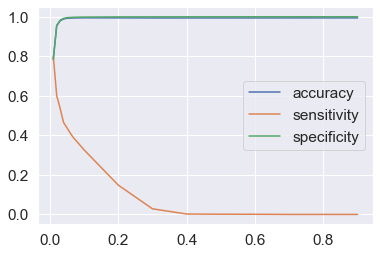

In [254]:
# plotting graph
curve.plot()

*Because of class imbalance we cannot get clear insights from the graph as accuracy is obviously not a good metric, so 
we will go with recall and precision metrics*

In [255]:
for t in threshold:
  curve.loc[t,"Precision"] = metrics.precision_score(model_predictions.Actual,model_predictions[t])
  curve.loc[t,"Recall"] = metrics.recall_score(model_predictions.Actual,model_predictions[t])

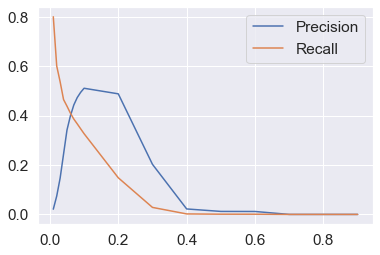

In [256]:
curve[["Precision","Recall"]].plot()

*Optimal point is 0.1, but the resultant precision and recall are very low, we need to find optimum value*

In [257]:
curve

,accuracy,sensitivity,specificity,Precision,Recall
0.01,0.784635,0.799893,0.784546,0.021159,0.799893
0.02,0.954295,0.600719,0.956353,0.074189,0.600719
0.03,0.979281,0.536637,0.981858,0.146922,0.536637
0.04,0.988562,0.464828,0.991611,0.243918,0.464828
0.05,0.991852,0.438183,0.995076,0.341289,0.438183
0.06,0.993003,0.409939,0.996398,0.398524,0.409939
0.07,0.993635,0.385825,0.997174,0.442881,0.385825
0.08,0.993968,0.366507,0.997621,0.472843,0.366507
0.09,0.994163,0.34639,0.997934,0.494015,0.346390
0.10,0.994289,0.326672,0.998176,0.510514,0.326672


*There is quite a big difference in values of recall and precision due to huge class imbalance issue. Our aim is to
identify all fraud cases which means achieving max possible 1) **specificity** -> total negatives predictions out of all 
actual negatives, 2) **precision** -> positive rate i.e out of all the positive predictions, how many are active positives, 
3) **recall** -> out of all the fraud cases how many are predicted correctly as fraud transactions. So class imbalance issue
needs to be addressed.
Since we need to find as many fruad cases as are present so we need to get high recall model to avoid any loses of business*

In [258]:
model_predictions.head()

,Actual,Pred_Prob,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.055631,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.084778,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.026258,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.050759,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.025673,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [259]:
# merging the datasets
profit = pd.merge(train_df["amt"],model_predictions,left_index = True,right_index=True)

In [260]:
profit.head()

,amt,Actual,Pred_Prob,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,4.97,0,0.055631,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,0,0.084778,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,220.11,0,0.026258,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,0,0.050759,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,0,0.025673,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
profit_table = pd.DataFrame(index = threshold,columns = ["Fraud_Loss","Predicted_Loss","Cost","Profit_Of_Company"])

In [262]:
for t in threshold:
  loss = train_df[train_df["is_fraud"]==1]["amt"].sum()
  Predicted_Loss1 = profit[(profit[t]==1) & (profit["Actual"]==1)]["amt"].sum()
  cost = profit[t].sum()*1.5
  Profit = Predicted_Loss1 - cost

  profit_table.loc[t] = [loss,Predicted_Loss1,cost,Profit]

In [263]:
profit_table

,Fraud_Loss,Predicted_Loss,Cost,Profit_Of_Company
0.01,3988088.61,3871698.05,425641.5,3446056.55
0.02,3988088.61,3479632.66,91165.5,3388467.16
0.03,3988088.61,3235968.21,41124.0,3194844.21
0.04,3988088.61,2975272.11,21456.0,2953816.11
0.05,3988088.61,2845578.38,14455.5,2831122.88
0.06,3988088.61,2695754.43,11581.5,2684172.93
0.07,3988088.61,2549251.49,9808.5,2539442.99
0.08,3988088.61,2431146.59,8727.0,2422419.59
0.09,3988088.61,2304613.48,7894.5,2296718.98
0.10,3988088.61,2177329.42,7204.5,2170124.92


*It can be clearly seen that multiple 0.01 has the highest cost saving which will be done by the business. So we will go with 0.01 multiple having 79% recall and 2% precision*

**0.01**
**accuracy	| sensitivity	|specificity	|Precision	|Recall**
 (*0.784635,	0.799893,	0.784546,	0.021159,	0.799893*)
 **From the Curve**

**ROC Curve**

In [264]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def plot_roc_curve( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    
   
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate')
    
    plt.ylabel('True Positive Rate')
    
    plt.title('ROC Curve')
    
    plt.legend(loc="best")

    plt.show()

    return None   # no return

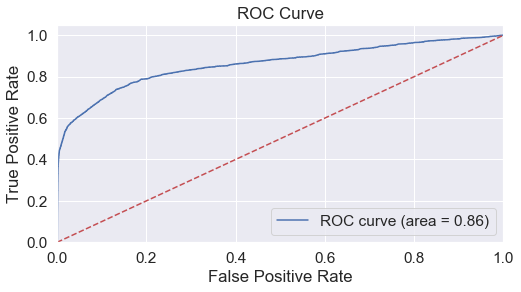

In [265]:
plot_roc_curve(model_predictions["Actual"],model_predictions["Pred_Prob"])

*The area under the curve is 86% which is really a good curve, and we can think of moving forward with this model*

**<center>Test Data-Set operations</center>**

In [266]:
# splitting test data set to x features and target variables
test_target = data_tst2["is_fraud"]
test_x = data_tst2.drop("is_fraud",1)

In [267]:
# Normalising the data
test_x[["amt","Time","displacement","recency"]] = sc.fit_transform(test_x[["amt","Time","displacement","recency"]])

In [270]:
# predicting values of test dataset
result = result_2.predict(sm.add_constant(test_x[cols_1]))

In [272]:
# assigning of values
model_predictions_test = pd.DataFrame({"Actual": test_target,"Pred_Prob" : result})

In [273]:
model_predictions_test["Final"] = model_predictions_test["Pred_Prob"].map(lambda p: 0 if p < 0.01 else 1)

In [274]:
metrics.precision_score(model_predictions_test["Actual"], model_predictions_test["Final"])

0.013330009271017552

In [275]:
metrics.recall_score(model_predictions_test["Actual"], model_predictions_test["Final"])

0.7976689976689977

In [276]:
print(metrics.classification_report(model_predictions_test["Actual"], model_predictions_test["Final"]))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87    553574
           1       0.01      0.80      0.03      2145

    accuracy                           0.77    555719
   macro avg       0.51      0.78      0.45    555719
weighted avg       1.00      0.77      0.87    555719



*Recall score is high, which is what is required. Next is to calculate the profit by the business from the model.*


**Gain Of the model** : Here we will calculate the amount under the fraud cases, and if these fraud cases are prevented how much profit can a company made.

In [277]:
profit = pd.merge(test_df["amt"],model_predictions_test,left_index = True,right_index = True)

In [278]:
loss = test_df[test_df["is_fraud"]==1]["amt"].sum()

Predicted_Loss = profit[(profit["Final"] == 1) & (profit["Actual"] == 1)]["amt"].sum()

cost = profit["Final"].sum() * 1.5  #multiplying with 1.5 for adjustments

Profit = Predicted_Loss - cost

profit_table = pd.DataFrame({"Fraud_Loss" : [loss],"Predicted_Loss" : [Predicted_Loss],"Cost" : [cost],"Profit_Of_Company" : [Profit]})

In [280]:
profit_table

,Fraud_Loss,Predicted_Loss,Cost,Profit_Of_Company
0,1133324.68,1103327.85,192535.5,910792.35


*It can be noticed that model can save company 910k (unit) as can be seen from the result above.*

**Final Results**

Since we went through all the models which can be found, we like to proceed with logistic regression, so let's get final insights on Test Data

In [281]:
test_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'job', 'is_fraud', 'recency', 'displacement',
       'location', 'Time', 'city_pop_division', 'recency_division'],
      dtype='object')

**Average transactions in a month**

In [282]:
test_df["month"] = test_df["trans_date_trans_time"].dt.month

In [283]:
test_df["year"] = test_df["trans_date_trans_time"].dt.year

In [284]:
result_1 = (test_df.groupby(by = ["month","year"]).count()).mean()

In [285]:
result_1[1]

79388.42857142857

**Average Fraudulent transactions in a month**

In [286]:
result_2 = (test_df[test_df["is_fraud"] == 1].groupby(by = ["month", "year"]).count()).mean()

In [287]:
result_2[1]

306.42857142857144

**Average amount per fraudulent transaction**

In [288]:
result_3 = test_df[test_df["is_fraud"] == 1]["amt"].sum() / test_df[test_df["is_fraud"] == 1].count()

In [289]:
result_3[1]

528.3564941724942

**Cost incurred per month before the model was applied (result2 * result3)**

In [290]:
result_2[1] * result_3[1]

161903.52571428573

**Average transactions per month detected as fraud by the model (TF)**

In [291]:
model_predictions_test.head()

,Actual,Pred_Prob,Final
0,0,0.036283,1
1,0,0.031794,1
2,0,0.027705,1
3,0,0.057576,1
4,0,0.015234,1


In [292]:
# joining date with predictions
predictions_tst = pd.merge(test_df[["trans_date_trans_time","month","year"]], model_predictions_test, right_index=True, left_index= True)

In [293]:
predictions_tst.head()

,trans_date_trans_time,month,year,Actual,Pred_Prob,Final
0,2020-06-21 12:14:25,6,2020,0,0.036283,1
1,2020-06-21 12:14:33,6,2020,0,0.031794,1
2,2020-06-21 12:14:53,6,2020,0,0.027705,1
3,2020-06-21 12:15:15,6,2020,0,0.057576,1
4,2020-06-21 12:15:17,6,2020,0,0.015234,1


**Now for finding total frauds, we will take final column will group it by year and month and will take the average of it,this will give us average fraudulent transactions detected.**

In [294]:
TF = (predictions_tst[(predictions_tst["Final"] == 1)].groupby(by=["year","month"]).count()).mean()[1]

In [295]:
TF

18336.714285714286

**overall/total cost month wise for fraud cases identified by the model (TF*$1.5)**

In [296]:
TF * 1.5

27505.071428571428

**Average number of transactions per month that are fraudulent but not detected by the model (FN)**

In [297]:
FN = (predictions_tst[(predictions_tst["Final"]==0) & (predictions_tst["Actual"] == 1)].groupby(by=["year","month"]).count()).mean()[1]

In [298]:
FN

62.0

Cost incurred due to fraudulent transactions left undetected by the model(FN*Amt)

**overall data**

In [299]:
# aggregating amt column
predictions_tst = pd.merge(test_df[["amt"]],predictions_tst, right_index=True, left_index= True)

In [300]:
predictions_tst.head()

,amt,trans_date_trans_time,month,year,Actual,Pred_Prob,Final
0,2.86,2020-06-21 12:14:25,6,2020,0,0.036283,1
1,29.84,2020-06-21 12:14:33,6,2020,0,0.031794,1
2,41.28,2020-06-21 12:14:53,6,2020,0,0.027705,1
3,60.05,2020-06-21 12:15:15,6,2020,0,0.057576,1
4,3.19,2020-06-21 12:15:17,6,2020,0,0.015234,1


In [301]:
result_5 = predictions_tst[(predictions_tst["Final"] == 0) & (predictions_tst["Actual"] == 1)]["amt"].sum()

In [302]:
result_5

29996.83

**Cost incurred per month after the model is built and deployed**

In [303]:
# undetected fraudulent transactions per month
per_month_fraud_amount = (predictions_tst[(predictions_tst["Final"]==0) & (predictions_tst["Actual"] == 1)].groupby(by = ["year","month"]).sum()["amt"]).mean()

In [304]:
per_month_fraud_amount

4285.261428571428

In [305]:
#  TF*1.5
cost_per_month = TF * 1.5

In [306]:
# cost per month + undetected fraud losses per month
total_cost_per_month = per_month_fraud_amount + cost_per_month

In [307]:
total_cost_per_month

31790.332857142857

**final model Savings Per Month**

In [308]:
#before and after the model was built cost incurred per month:*
# i.e. (result2 * result3) - total_cost_per_month
(result_2[1]*result_3[1]) - total_cost_per_month

130113.19285714287

**<center>Fraud detection: 2 datasets(completed)</center>**